# Определение перспективного тарифа для телеком-компании

**Входные данные** Данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.  


*Описание тарифов:*  
**Тариф «Смарт»**  
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута);  
2. сообщение: 3 рубля;
3. 1 Гб интернет-трафика: 200 рублей.  
**Тариф «Ультра»**  
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
1. минута разговора: 1 рубль;  
2. сообщение: 1 рубль;  
3. 1 Гб интернет-трафика: 150 рублей.
*Примечание:*  
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


**Цель исследования** Сделать предварительный анализ тарифов на небольшой выборке клиентов. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


**Результаты исследования**  Проанализировать поведение клиентов и сделать вывод — какой тариф приносит больше денег.


**Ход исследования**
Данные получаем из файлов:  
Яндекс Практикума  

О качестве данных ничего не известно. Поэтому понадобится обзор данных. 
Таким образом, исследование пройдёт по следующим этапам:  
1. Обзор данных.
2. Подготовка данных.
3. Анализ данных.
4. Проверка гипотез.
5. Общий вывод.

## Обзор данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import ceil
import warnings

In [2]:
# отключить некритические предупреждения в коде
warnings.filterwarnings("ignore")

In [3]:
# убрать экспонентациальные формы при выводе данных
pd.set_option('display.float_format', '{:,.2f}'.format)

In [4]:
# сбросим ограничение на количество выводимых столбцов, что бы просмотреть все столбцы
pd.set_option('display.max_columns', None)

In [5]:
# чтение файлов с данными и сохранение в DataFrame
calls = pd.read_csv('***')
internet = pd.read_csv('***', index_col=0)
messages = pd.read_csv('***')
tariffs = pd.read_csv('***')
users = pd.read_csv('***')

In [6]:
# получение первых 5 строк таблицы calls
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000
2,1000_2,"1,197.26",2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [10]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [14]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Согласно документации к данным:  
**Таблица users (информация о пользователях):**  
user_id — уникальный идентификатор пользователя  
first_name — имя пользователя  
last_name — фамилия пользователя  
age — возраст пользователя (годы)  
reg_date — дата подключения тарифа (день, месяц, год)  
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
city — город проживания пользователя  
tarif — название тарифного плана  

**Таблица calls (информация о звонках):**  
id — уникальный номер звонка  
call_date — дата звонка  
duration — длительность звонка в минутах  
user_id — идентификатор пользователя, сделавшего звонок  

**Таблица messages (информация о сообщениях):**  
id — уникальный номер сообщения  
message_date — дата сообщения  
user_id — идентификатор пользователя, отправившего сообщение  

**Таблица internet (информация об интернет-сессиях):**  
id — уникальный номер сессии  
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
session_date — дата интернет-сессии  
user_id — идентификатор пользователя  

**Таблица tariffs (информация о тарифах):**  
tariff_name — название тарифа  
rub_monthly_fee — ежемесячная абонентская плата в рублях  
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
messages_included — количество сообщений в месяц, включённых в абонентскую плату  
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

В названиях колонок нарушений стиля нет. 
Названия колонок соответствуют документации.  
Типы данных: по всем столбцам, где дата , необходимо изменить тип данных object.  
Количество значений в столбцах совпадает. Значит, в данных нет пропущенных значений. По столбцу churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных).



**Выводы**  
Предварительно можно утверждать, что, данных достаточно для  анализа поведения клиентов, что бы определить какой тариф приносит больше денег компании.

*Необходимо*:  

    - изменить тип данных по столбцам, где это необходимо  
    - проанализировать данные на наличие аномалий и ошибок    
    - сгруппировать таблицы (звонки, трафик, сообщения) по пользователю и месяцу и объединить в единую таблицу с таблицей информации о пользователях для удобства работы.     

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Подготовка данных.

### Изменение типа данных

In [16]:
# заменим тип данных `object` на `datetime64` методом pd.to_datetime()",
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y-%m-%d')

In [17]:
# добавим столбцы год, месяц в таблицы, где есть дата
calls['year'] =pd.DatetimeIndex(calls['call_date']).year
internet['year'] = pd.DatetimeIndex(internet['session_date']).year
messages['year'] = pd.DatetimeIndex(messages['message_date']).year
users['year_start'] = pd.DatetimeIndex(users['reg_date']).year
calls['month'] =pd.DatetimeIndex(calls['call_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
users['month_start'] = pd.DatetimeIndex(users['reg_date']).month

Изменен тип данных в столбцах с датами, добавлены столбцы месяц и год в таблицы с датами.

### проанализировать данные на наличие аномалий и ошибок

In [18]:
calls.describe()

,duration,user_id,year,month
count,"202,607.00","202,607.00","202,607.00","202,607.00"
mean,6.76,"1,253.94","2,018.00",8.57
std,5.84,144.72,0.00,2.79
min,0.00,"1,000.00","2,018.00",1.00
25%,1.30,"1,126.00","2,018.00",7.00
50%,6.00,"1,260.00","2,018.00",9.00
75%,10.70,"1,379.00","2,018.00",11.00
max,38.00,"1,499.00","2,018.00",12.00


In [19]:
internet.describe()

,mb_used,user_id,year,month
count,"149,396.00","149,396.00","149,396.00","149,396.00"
mean,370.19,"1,252.10","2,018.00",8.56
std,278.30,144.05,0.00,2.79
min,0.00,"1,000.00","2,018.00",1.00
25%,138.19,"1,130.00","2,018.00",7.00
50%,348.01,"1,251.00","2,018.00",9.00
75%,559.55,"1,380.00","2,018.00",11.00
max,"1,724.83","1,499.00","2,018.00",12.00


In [20]:
messages.describe()

,user_id,year,month
count,"123,036.00","123,036.00","123,036.00"
mean,"1,256.99","2,018.00",8.63
std,143.52,0.00,2.75
min,"1,000.00","2,018.00",1.00
25%,"1,134.00","2,018.00",7.00
50%,"1,271.00","2,018.00",9.00
75%,"1,381.00","2,018.00",11.00
max,"1,499.00","2,018.00",12.00


In [21]:
users.describe()

,user_id,age,year_start,month_start
count,500.00,500.00,500.00,500.00
mean,"1,249.50",46.59,"2,018.00",6.48
std,144.48,16.67,0.00,3.39
min,"1,000.00",18.00,"2,018.00",1.00
25%,"1,124.75",32.00,"2,018.00",4.00
50%,"1,249.50",46.00,"2,018.00",7.00
75%,"1,374.25",62.00,"2,018.00",9.00
max,"1,499.00",75.00,"2,018.00",12.00


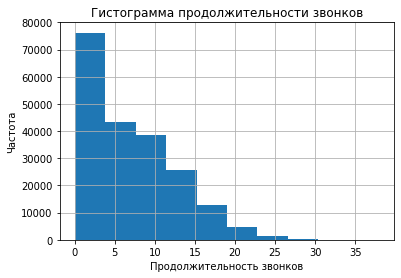

In [22]:
# Построим гистограмму продолжительности звонков
calls['duration'].hist()
plt.title(f'Гистограмма продолжительности звонков')
plt.xlabel(f'Продолжительность звонков')
plt.ylabel('Частота')
plt.show()

Достаточно большое количество звонков , продолжительностью 0, рассчитаем долю таких звонков 

In [23]:
print('Доля звонков, продолжительность которых равна нулю {0:.2%}'.format(calls.query('duration == 0').shape[0] \
                                                                          / calls.shape[0]))

Доля звонков, продолжительность которых равна нулю 19.55%


Согласно пояснениям к данным : Звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

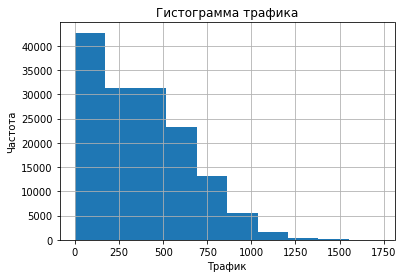

In [24]:
# Построим гистограмму трафика
internet['mb_used'].hist()
plt.title(f'Гистограмма трафика')
plt.xlabel(f'Трафик')
plt.ylabel('Частота')
plt.show()

In [25]:
print('Трафик, продолжительность которого равна нулю {0:.2%}'.format(internet.query('mb_used == 0').shape[0] \
                                                                          / internet.shape[0]))

Трафик, продолжительность которого равна нулю 13.12%


Скорее всего трафик равен нулю в ситуации, когда интернет у абонента подключен, но не было никакой онлайн активности. Данные менять не будем, считаем, что трафик ноль это корректно.

**Выводы**:  

Аномалий, неожиданных данных и ошибок при первоначальном просмотре статистик не обнаружено. Возникли вопросы по :  

1. В данных по звонкам 19,6% это звонки, продолжительность которых равно нулю. согласно информации к данным: 'Звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять'. Возникает вопрос нужно ди разделять звонки на входящие/исходящие и при расчете тарифа учитывать только исходящие. В текущих данных информации нет. 

2. В данных по трафику 13% это сессии, продолжительность которых равна нулю. Предположим, что это ситуации, когда интернет у абонента подключен, но не было никакой онлайн активности. Данные менять не будем, считаем, что трафик ноль это корректно. Данный момент так же при возможности необходимо уточнить у источника данных.

### Группировка таблиц и объединение

Сгруппируем таблицы (звонки,трафик,сообщения) по пользователю и месяцу и объединим в единую таблицу с таблицей информации о пользователях для удобства работы.     

In [26]:
# Создадим в calls столбец , с округленной в большую сторону продолжительностью звонка
calls['duration_int'] = np.ceil(calls['duration'])
calls.head()

,id,call_date,duration,user_id,year,month,duration_int
0,1000_0,2018-07-25,0.00,1000,2018,7,0.00
1,1000_1,2018-08-17,0.00,1000,2018,8,0.00
2,1000_2,2018-06-11,2.85,1000,2018,6,3.00
3,1000_3,2018-09-21,13.80,1000,2018,9,14.00
4,1000_4,2018-12-15,5.18,1000,2018,12,6.00


In [27]:
# Рассчитаем для каждого пользовател количество сделанных звонков и израсходованных минут разговора по месяцам;
calls_month = calls.groupby(['user_id','month'],as_index=True)['duration_int'].agg(['count',sum])
calls_month.reset_index(inplace=True)
calls_month.rename(columns={'count':'calls_count','sum':'calls_sum'},inplace=True)
calls_month

,user_id,month,calls_count,calls_sum
0,1000,5,22,159.00
1,1000,6,43,172.00
2,1000,7,47,340.00
3,1000,8,52,408.00
4,1000,9,58,466.00
...,...,...,...,...
3169,1498,10,41,247.00
3170,1499,9,9,70.00
3171,1499,10,68,449.00
3172,1499,11,74,612.00


In [28]:
# Рассчитаем для каждого пользовател количество отправленных сообщений по месяцам
messages_month = messages.groupby(['user_id','month'],as_index=True)['id'].agg(['count',])
messages_month.reset_index(inplace=True)
messages_month.rename(columns={'count':'messages_count'},inplace=True)
messages_month

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [29]:
# Рассчитаем для каждого пользовател объем израсходованного интернет-трафика по месяцам
internet_month = internet.groupby(['user_id','month'],as_index=True)['mb_used'].agg([sum,])
internet_month.reset_index(inplace=True)
internet_month.rename(columns={'sum':'internet_sum'},inplace=True)
internet_month

,user_id,month,internet_sum
0,1000,5,"2,253.49"
1,1000,6,"23,233.77"
2,1000,7,"14,003.64"
3,1000,8,"14,055.93"
4,1000,9,"14,568.91"
...,...,...,...
3198,1498,10,"20,579.36"
3199,1499,9,"1,845.75"
3200,1499,10,"17,788.51"
3201,1499,11,"17,963.31"


In [30]:
# Объединим данные по звонкам с данными по трафику в таблицу расходы
expenses = calls_month.merge(internet_month,on=['user_id','month'],how='outer')

In [31]:
# Добавим данные по сообщениям
expenses = expenses.merge(messages_month,on=['user_id','month'],how='outer')

In [32]:
# Проверим наличие незаполненных ячеек
expenses.isna().sum()

user_id             0
month               0
calls_count        40
calls_sum          40
internet_sum       11
messages_count    497
dtype: int64

In [33]:
# Заполним пропущенные значения нулями
expenses.fillna(0,inplace=True)

In [34]:
# Проверим наличие незаполненных ячеек
expenses.isna().sum()

user_id           0
month             0
calls_count       0
calls_sum         0
internet_sum      0
messages_count    0
dtype: int64

In [35]:
# Объединим данные по расходам с таблицей пользователей
users_full = users.merge(expenses,on='user_id',how='outer')

In [36]:
# Проверим наличие незаполненных ячеек
users_full.isna().sum()

user_id              0
age                  0
churn_date        3027
city                 0
first_name           0
last_name            0
reg_date             0
tariff               0
year_start           0
month_start          0
month                2
calls_count          2
calls_sum            2
internet_sum         2
messages_count       2
dtype: int64

In [37]:
# Заполним пропущенные значения нулями
na_list =['month','calls_count','calls_sum','internet_sum','messages_count']
for i in na_list:
    users_full[i].fillna(0,inplace=True)

In [38]:
users_full.isna().sum()

user_id              0
age                  0
churn_date        3027
city                 0
first_name           0
last_name            0
reg_date             0
tariff               0
year_start           0
month_start          0
month                0
calls_count          0
calls_sum            0
internet_sum         0
messages_count       0
dtype: int64

In [39]:
users_full.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,year_start,month_start,month,calls_count,calls_sum,internet_sum,messages_count
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018,5,5.00,22.00,159.00,"2,253.49",22.00
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018,5,6.00,43.00,172.00,"23,233.77",60.00
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018,5,7.00,47.00,340.00,"14,003.64",75.00
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018,5,8.00,52.00,408.00,"14,055.93",81.00
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018,5,9.00,58.00,466.00,"14,568.91",57.00


In [40]:
# Рассчитаем помесячную выручку с каждого пользователя 
# (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика;
# остаток умножить на значение из тарифного плана;
# прибавить абонентскую плату, соответствующую тарифному плану)
for tarif in ['smart','ultra']:
    users_full_temp = users_full.query('tariff == @tarif')
    t = tariffs.query('tariff_name == @tarif')
    
    users_full_temp.loc[:,'revenue_calls'] = (users_full_temp['calls_sum'] - t.iloc[0,2]).clip(0) * t.iloc[0,6]                                                   
    
    users_full_temp.loc[:,'revenue_internet'] = (users_full_temp['internet_sum'] -  t.iloc[0,1]).clip(0) 
    
    users_full_temp.loc[:,'revenue_internet'] = np.where(users_full_temp['revenue_internet'] % 1024 == 0,
                                                         users_full_temp['revenue_internet'] // 1024 * t.iloc[0,4],
                                                         (users_full_temp['revenue_internet'] // 1024 +1) *  t.iloc[0,4]
                                                        )            
    
    users_full_temp.loc[:,'revenue_messages'] = (users_full_temp['messages_count'] - t.iloc[0,0]).clip(0) * t.iloc[0,5]                                             
   
    users_full_temp.loc[:,'revenue'] = users_full_temp.loc[:,'revenue_calls'] \
                                       + users_full_temp.loc[:,'revenue_internet'] \
                                       + users_full_temp.loc[:,'revenue_messages'] \
                                       + t.iloc[0,3]
                
    users_full.loc[users_full['tariff'] == tarif,'revenue'] = users_full_temp.loc[:,'revenue']

In [41]:
users_full.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,year_start,month_start,month,calls_count,calls_sum,internet_sum,messages_count,revenue
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018,5,5.00,22.00,159.00,"2,253.49",22.00,"1,950.00"
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018,5,6.00,43.00,172.00,"23,233.77",60.00,"1,950.00"
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018,5,7.00,47.00,340.00,"14,003.64",75.00,"1,950.00"
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018,5,8.00,52.00,408.00,"14,055.93",81.00,"1,950.00"
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018,5,9.00,58.00,466.00,"14,568.91",57.00,"1,950.00"


In [42]:
# Проверим по пользователям , у которых указан срок действия тарифа, что данные по звонкам,
# сообщениям и трафику в рамках срока начала и окончания действия тарифа
users_exit = users_full.query('~churn_date.isna()')

In [43]:
# изменим формат churn_date и добавим стлбец с месяцем окончания договора
users_exit.loc[:,'churn_date'] = pd.to_datetime(users_exit.loc[:,'churn_date'],format='%Y-%m-%d')
users_exit.loc[:,'month_end'] = pd.DatetimeIndex(users_exit.loc[:,'churn_date']).month

In [44]:
users_exit.query('(month_start > month_end) or (month_start > month) or (month_end < month)')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,year_start,month_start,month,calls_count,calls_sum,internet_sum,messages_count,revenue,month_end
827,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,2018,12,0.00,0.00,0.00,0.00,0.00,"1,950.00",12
2335,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,2018,12,0.00,0.00,0.00,0.00,0.00,550.00,12


In [45]:
# Проверим по пользователям , у которых срок действия тарифа не закончен, что данные по звонкам,
# сообщениям и трафику после даты начала тарифа
users_not_exit = users_full.query('churn_date.isna()').sort_values(['user_id','month'])
users_not_exit.query('month_start > month').shape

(0, 16)

In [46]:
# Проверим , что тариф по незакрытым договорам начислен за все месяцы с даты старта договора до декабря
users_id = []
for i in users_not_exit.groupby(['user_id','month_start'])['month']:
    month = i[0][1]    
    for j in i[1]: 
        if j != month:
            users_id.append(i[0][0])
        month += 1    
print(users_id)

[]


**Вывод**:  
- Сформирован единый датасет со всеми необходимыми для последующего анализа данными users_full.  
- Проверено, что по пользователям, по которым контракт закрыт даты звонков, трафика, сообщений находятся в интервале между датой начала и окончания договора.  
- Проверено по пользователям, по которым контракт не закрыт , что  даты звонков, трафика, сообщений соответствуют дате после подписания договора и за все периоды есть данные.

## Анализ данных.

In [47]:
# Основные статистические показатели для тарифа ultra
users_full.query('tariff == "ultra"').describe()

,user_id,age,year_start,month_start,month,calls_count,calls_sum,internet_sum,messages_count,revenue
count,986.00,986.00,986.00,986.00,986.00,986.00,986.00,986.00,986.00,986.00
mean,"1,262.96",46.84,"2,018.00",4.64,8.24,73.32,526.09,"19,449.06",49.31,"2,070.03"
std,140.69,17.10,0.00,2.74,2.88,43.96,317.89,"10,101.10",47.81,376.02
min,"1,000.00",18.00,"2,018.00",1.00,0.00,0.00,0.00,0.00,0.00,"1,950.00"
25%,"1,143.00",30.00,"2,018.00",2.00,6.00,41.00,282.50,"11,748.59",6.00,"1,950.00"
50%,"1,277.00",45.00,"2,018.00",4.00,9.00,73.50,518.00,"19,304.02",38.00,"1,950.00"
75%,"1,381.00",63.00,"2,018.00",6.00,11.00,103.75,751.75,"26,835.88",78.75,"1,950.00"
max,"1,495.00",75.00,"2,018.00",12.00,12.00,244.00,"1,673.00","49,745.69",224.00,"4,800.00"


In [48]:
# Основные статистические показатели для тарифа smart
users_full.query('tariff == "smart"').describe()

,user_id,age,year_start,month_start,month,calls_count,calls_sum,internet_sum,messages_count,revenue
count,"2,230.00","2,230.00","2,230.00","2,230.00","2,230.00","2,230.00","2,230.00","2,230.00","2,230.00","2,230.00"
mean,"1,246.56",46.56,"2,018.00",4.76,8.34,58.44,417.75,"16,201.12",33.37,"1,289.64"
std,146.11,16.35,0.00,2.98,2.93,25.96,190.48,"5,879.19",28.23,818.37
min,"1,001.00",18.00,"2,018.00",1.00,0.00,0.00,0.00,0.00,0.00,550.00
25%,"1,121.00",32.00,"2,018.00",2.00,6.00,40.00,282.00,"12,630.04",10.00,550.00
50%,"1,240.00",47.00,"2,018.00",4.00,9.00,60.00,421.50,"16,505.47",28.00,"1,021.00"
75%,"1,376.00",62.00,"2,018.00",7.00,11.00,76.00,545.00,"20,042.11",51.00,"1,750.00"
max,"1,499.00",75.00,"2,018.00",12.00,12.00,198.00,"1,435.00","38,552.45",143.00,"6,770.00"


In [49]:
# Создадим список тарифов и показателей, которые будем анализировать
tariffs_ = ['smart','ultra']
parameters = ['calls_sum', 'internet_sum', 'messages_count', 'revenue']

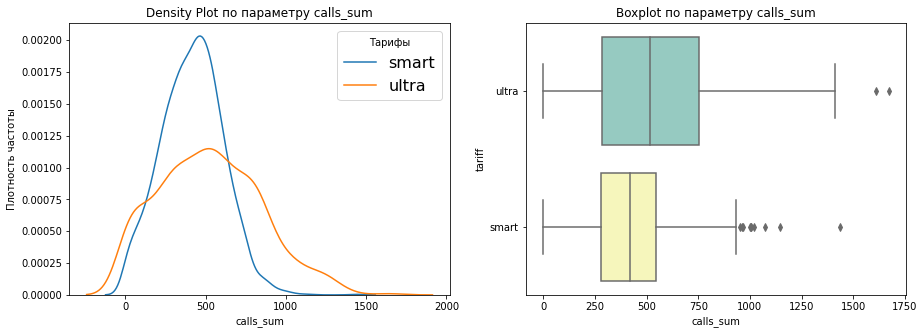

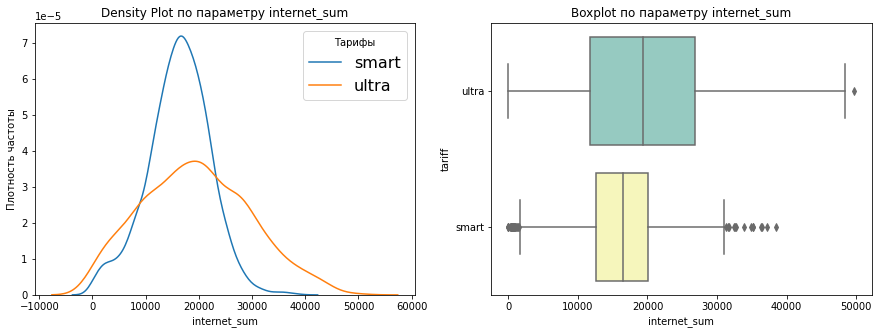

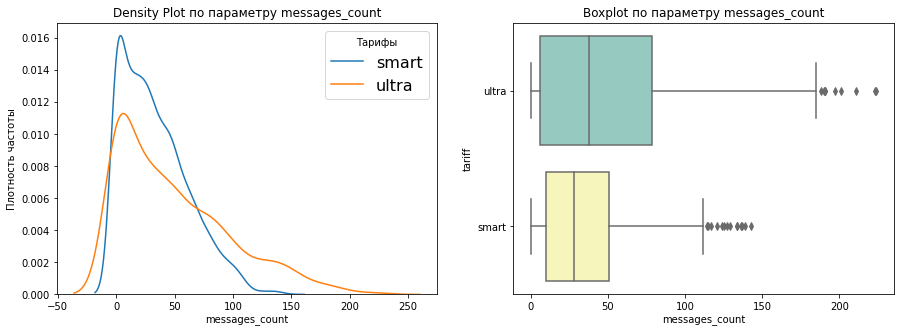

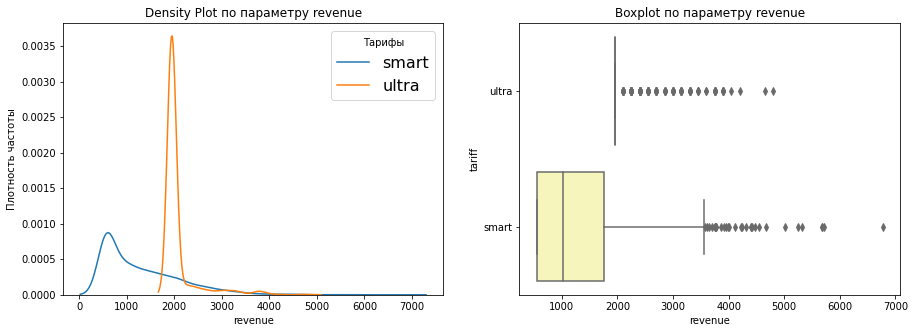

In [50]:
# Посмотрим на графиках плотности частоты и бокс плот параметра по тарифам
for parameter in parameters:
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    
    for tariff in tariffs_:
        subset = users_full[users_full['tariff'] == tariff]    

        sns.distplot(subset[parameter], 
                     hist = False, 
                     kde = True,
                     kde_kws = {'linewidth': 1.5},
                     label = tariff)

    plt.legend(prop={'size': 16}, title = 'Тарифы')
    plt.title(f'Density Plot по параметру {parameter}')
    plt.xlabel(f'{parameter}')
    plt.ylabel('Плотность частоты')
   # plt.show()
   # plt.figsize=(15,5)
    plt.subplot(1, 2, 2)
    sns.boxplot(x = parameter, y = 'tariff', data = users_full, orient="h", palette="Set3")
    plt.title(f'Boxplot по параметру {parameter}')      
    plt.show()
    print()

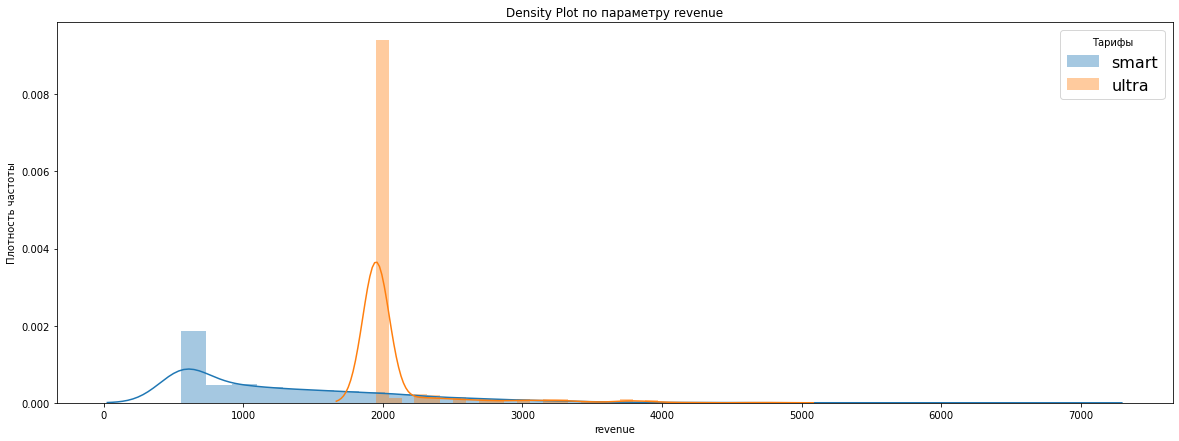

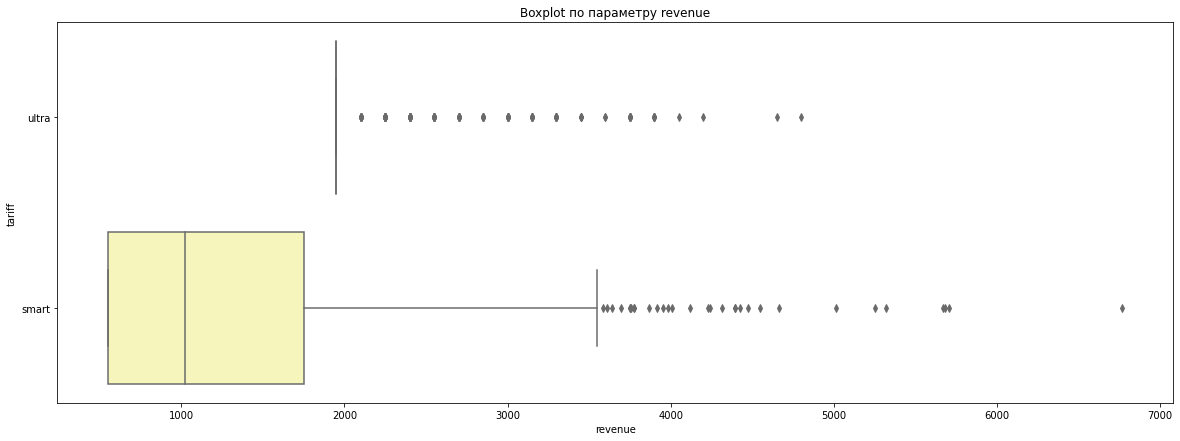

In [51]:
# сделаем более крупными графики по параметру revenue
plt.figure(figsize=(20,7))
for tariff in tariffs_:
    subset = users_full[users_full['tariff'] == tariff]    

    sns.distplot(subset['revenue'], 
                 hist = True, 
                 kde = True,
                 kde_kws = {'linewidth': 1.5},
                 label = tariff)

plt.legend(prop={'size': 16}, title = 'Тарифы')
plt.title(f'Density Plot по параметру revenue')
plt.xlabel('revenue')
plt.ylabel('Плотность частоты')
plt.show()
plt.figure(figsize=(20,7))
sns.boxplot(x = 'revenue', y = 'tariff', data = users_full, orient="h", palette="Set3")
plt.title(f'Boxplot по параметру revenue')      
plt.show()
print()

**Вывод**:  

- В среднем для тарифа smart требуется 417 минут разговора,а для тарифа ultra 526 минут разговора. Медиана данных показателей 421 и 518 соответственно.
- В среднем для тарифа smart требуется 33 сообщения,а для тарифа ultra 49 сообщений. Медиана данных показателей 28 и 38 соответственно.
- В среднем для тарифа smart требуется 16 201 мб интернет-трафика, а для тарифа ultra 19 449 мб.Медиана данных показателей 16 505 и  19304 соответственно.
- Медианны у тарифа ultra по всем параметрам больше, чем у тарифа smart. По тарифу ultra намного длиннее усы, что означает, что много клиентов, кто платит ощутимо больше медианной суммы.
- По тарифу ultra по всем параметрам среднее больше , чем медиана, т.е. данные скошены вправо, а по тарифу smart только по параметру количество сообщений данные скошены вправо, по трафику и продолжительности звонков медиана и среднее практически равны, по трафику даже небольшое смещение влево.
- Стандартное отклонения для тарифа ultra значительно превышает стандартное отклонение для тарифа smart. Распределение шире по тарифу ultra по всем показателям, кроме выручки. По выручке стандартное отклонение по тарифу smart(818) значительно превышает значение по тарифу ultra (376).
- По revenue тариф ультра 1,2 и 3 квартили расположены на уровне 1950 руб., тогда как по тарифу smart  3 квартиль соответствует 1730 руб. Несмотря на то , что по revenue медиана меньше среднего и данные скошены вправо для обоих тарифов, у тарифа smart значительно шире размах вправо.

## Проверка гипотез.

Проверим гипотезы:  
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;  
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Пороговое значение alpha зададим на уровне 0,05.  


### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

**Нулевая гипотеза** : Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая.  
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind ()  
**Альтернативная гипотеза**: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.


In [52]:
# Воспользуемся стат.тестом Левене, для понимания какое значение указывать по параметру equal_var для проверки гипотезы
st.levene(users_full[users_full['tariff'] == 'smart']['revenue'],
          users_full[users_full['tariff'] == 'ultra']['revenue']
         ).pvalue

2.3578651290079928e-122

Очень маленькое значение pvalue говорит о том, что данные выборки имеют разные дисперсии. Параметр equal_var необходимо указать как False.

In [53]:
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(users_full[users_full['tariff'] == 'smart']['revenue'],
                       users_full[users_full['tariff'] == 'ultra']['revenue'],
                      equal_var = False
                      ) 
print('p-значение:', results.pvalue)

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


**Вывод** 

p-значение очень маленькое, даже меньше 1%, мы можем отвергнуть нулевую гипотезу и *подтвердить гипотезу о том , что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются*

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**Нулевая гипотеза** : Средняя выручка пользователей из Москвы соответствует средней выручки пользователей из других регионов.  
Чтобы проверить данную гипотезу, применим метод scipy.stats.ttest_ind ()  
**Альтернативная гипотеза** : средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

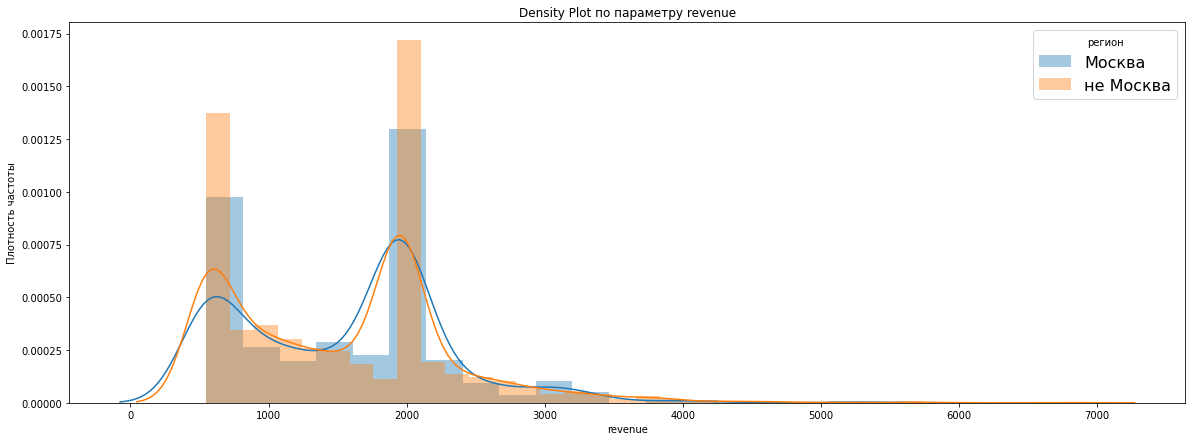

In [54]:
# построим график выручке по Москве и другим регионам
plt.figure(figsize=(20,7))
subset = users_full[users_full['city'] == 'Москва']    
sns.distplot(subset['revenue'], 
                 hist = True, 
                 kde = True,
                 kde_kws = {'linewidth': 1.5},
                 label = 'Москва'
            )
plt.legend(prop={'size': 16}, title = 'Москва')
subset = users_full[users_full['city'] != 'Москва']    
sns.distplot(subset['revenue'], 
                 hist = True, 
                 kde = True,
                 kde_kws = {'linewidth': 1.5},
                 label = 'не Москва'
            )

plt.legend(prop={'size': 16}, title = 'регион')
plt.title(f'Density Plot по параметру revenue')
plt.xlabel('revenue')
plt.ylabel('Плотность частоты')
plt.show()


In [55]:
# посмотрим статистику по revenue по Москве
users_full[users_full['city'] == 'Москва']['revenue'].describe()

count     611.00
mean    1,546.71
std       752.09
min       550.00
25%       780.50
50%     1,750.00
75%     1,950.00
max     5,321.00
Name: revenue, dtype: float64

In [56]:
# посмотрим статистику по revenue по регионам
users_full[users_full['city'] != 'Москва']['revenue'].describe()

count   2,605.00
mean    1,524.73
std       808.75
min       550.00
25%       750.00
50%     1,583.00
75%     1,950.00
max     6,770.00
Name: revenue, dtype: float64

In [57]:
# Воспользуемся стат.тестом Левене, для понимания какое значение указывать по параметру equal_var для проверки гипотезы
st.levene(users_full[users_full['city'] == 'Москва']['revenue'],users_full[users_full['city'] != 'Москва']['revenue']).pvalue

0.014015266770621706

Значение pvalue теста Левене менее 0,05 говорит о том, что данные выборки имеют разные дисперсии. Параметр equal_var необходимо указать как False.

In [58]:
# рассчитаем pvalue для понимания возможности отвергнуть нулевую гипотезу
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(users_full[users_full['city'] == 'Москва']['revenue'],
                       users_full[users_full['city'] != 'Москва']['revenue'],
                       equal_var = False)

print('p-значение:', '{0:.2%}'.format(results.pvalue))

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 52.17%
Не получилось отвергнуть нулевую гипотезу


**Вывод**:   

Полученное значение p-value говорит о том, что с вероятностью ,более 52% различие средней выручки по Москве и другим регионам можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средней выручкой по Москве  и средней выручкой по другим регионам.  
*Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.*

## Общий вывод.

- Медианны у тарифа ultra по всем параметрам больше, чем у тарифа smart. По тарифу ultra намного длиннее усы, что означает, что много клиентов, кто платит ощутимо больше медианной суммы.
- По тарифу ultra по всем параметрам среднее больше , чем медиана, т.е. данные скошены вправо, а по тарифу smart только по параметру количество сообщений данные скошены вправо, по трафику и продолжительности звонков медиана и среднее практически равны, по трафику даже небольшое смещение влево.
- Стандартное отклонения для тарифа ultra значительно превышает стандартное отклонение для тарифа smart. Распределение шире по тарифу ultra по всем показателям, кроме выручки. По выручке стандартное отклонение по тарифу smart(818) значительно превышает значение по тарифу ultra (376).
- По revenue тариф ультра 1,2 и 3 квартили расположены на уровне 1950 руб., тогда как по тарифу smart  3 квартиль соответствует 1730 руб. Несмотря на то , что по revenue медиана меньше среднего и данные скошены вправо для обоих тарифов, у тарифа smart значительно шире размах вправо.
- *Мы можем подтвердить гипотезу о том , что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются*
- *Мы не можем подтвердить гипотезу о том , что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов*.

В процессе анализа возникли вопросы, которые необходимо уточнить у источника данных для более точного анализа :
1. В данных по звонкам 19,6% это звонки, продолжительность которых равно нулю. согласно информации к данным: 'Звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять'. Возникает вопрос нужно ди разделять звонки на входящие/исходящие и при расчете тарифа учитывать только исходящие. В текущих данных информации нет, для исследования учитывали все звонки в предоставленных данных. 

2. В данных по трафику 13% это сессии, продолжительность которых равна нулю. Предположили, что это ситуации, когда интернет у абонента подключен, но не было никакой онлайн активности. Данные не менялись, считали, что трафик ноль это корректно.